In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, classification_report, f1_score, precision_score, recall_score

In [ ]:
def classification_summary(y_test, pred, pred_prob):
    print('Accuracy = {}%'.format(round(accuracy_score(y_test, pred), 3)*100))
    print('F1 Score = {}%'.format(round(f1_score(y_test, pred, average='weighted'), 3)*100))
    print("AUC score: {:.3f}".format(round(roc_auc_score(y_test, pred_prob), 3)*100))
    print('Recal Score = {}%'.format(round(recall_score(y_test, pred, average='weighted'), 3)*100))
    print('Precision = {}%'.format(round(precision_score(y_test, pred, average='weighted'), 3)*100))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_test, pred))

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown https://drive.google.com/uc?id=1eCJz8mommzUbqhIvGm0GHx2AlR_Iw01V&authuser=0&export=download --folder

/bin/bash: --folder: command not found
Downloading...
From: https://drive.google.com/uc?id=1eCJz8mommzUbqhIvGm0GHx2AlR_Iw01V
To: /content/dataset.zip
100% 242M/242M [00:02<00:00, 93.9MB/s]


In [ ]:
!ls

dataset.zip  sample_data


In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/COVID/
  inflating: dataset/COVID/Covid (937).png  
  inflating: dataset/COVID/Covid (936).png  
  inflating: dataset/COVID/Covid (922).png  
  inflating: dataset/COVID/Covid (952).png  
  inflating: dataset/COVID/Covid (997).png  
  inflating: dataset/COVID/Covid (934).png  
  inflating: dataset/COVID/Covid (956).png  
  inflating: dataset/COVID/Covid (975).png  
  inflating: dataset/COVID/Covid (978).png  
  inflating: dataset/COVID/Covid (875).png  
  inflating: dataset/COVID/Covid (901).png  
  inflating: dataset/COVID/Covid (99).png  
  inflating: dataset/COVID/Covid (912).png  
  inflating: dataset/COVID/Covid (867).png  
  inflating: dataset/COVID/Covid (900).png  
  inflating: dataset/COVID/Covid (94).png  
  inflating: dataset/COVID/Covid (921).png  
  inflating: dataset/COVID/Covid (89).png  
  inflating: dataset/COVID/Covid (874).png  
  inflating: dataset/COVID/Covid (95).png  
  inflating: dataset/COVID/Covid

In [ ]:
!ls
!rm -rf dataset.zip
!ls

dataset  dataset.zip  sample_data
dataset  sample_data


In [ ]:
covid_class = ['COVID', 'non-COVID']
data_dir = 'dataset/'
train_dir = os.path.join(data_dir)
IMAGE_SIZE = 64

In [ ]:
def create_data_frame():
    train_data = []
    for defects_id, sp in enumerate(covid_class):
        for file in os.listdir(os.path.join(train_dir, sp)):
            train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
    return pd.DataFrame(train_data, columns=[
        'file', 'id_class', 'class'])

In [ ]:
def random_data_frame(data):
    data = data.sample(frac=1, random_state=42)
    data.index = np.arange(len(data))
    return data

In [ ]:
def read_image(filepath):  # Loading a color image is the default flag
    return cv2.imread(os.path.join(data_dir, filepath))

In [ ]:
def resize_image(image, image_size):  # Resize image to target size
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

In [ ]:
def load_images(data):
    X_train = np.zeros((data.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
    for i, file in tqdm(enumerate(data['file'].values)):
        image = read_image(file)
        if image is not None:
            X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
    images = X_train / 255.  # Normalize the data
    print("Total de imagens carregadas: " + str(len(images)))
    return images

In [ ]:
def image_data_gen():
    return ImageDataGenerator(
        rotation_range=20,  # Rotaciona aleatoriamente as imagens no intervalo de 0 a 20 graus
        width_shift_range=0.2,  # Desloca horizontalmente as imagens em até 10% do tamanho total
        height_shift_range=0.2,  # Desloca verticalmente as imagens em até 10% do tamanho total
        zoom_range=0.2,  # Aplica zoom aleatório nas imagens
        horizontal_flip=True,  # Realiza espelhamento horizontal aleatório nas imagens
        vertical_flip=True,
        fill_mode='nearest',  # Preenche pixels ausentes após transformações
    )

In [ ]:
def create_augmentation_for_images(from_path, save_to_path, n_iter):
  img_gen = image_data_gen()
  aug_images = img_gen.flow_from_directory(
      from_path,
      target_size=(IMAGE_SIZE, IMAGE_SIZE),
      save_to_dir=save_to_path,
      class_mode = None,
      save_prefix='generated_',
      batch_size=100,
      color_mode="rgb",
      subset=None,
  )

  for x in range(0, n_iter):
    aug_images.next()


PATH_FOR_IMG_AUGMENTATION_COVID = 'aug/covid_class/'
PATH_FOR_IMG_AUGMENTATION_NON_COVID = 'aug/non_covid_class/'

COVID_DATA_PATH = 'dataset/COVID'
NON_COVID_DATA_PATH = 'dataset/non-COVID'

In [ ]:
!cd dataset/COVID/ && rm generated_*.png
!cd dataset/non-COVID/ && rm generated_*.png

!rm -rf aug/

!mkdir -p aug/covid_class/
!cp -R dataset/COVID aug/covid_class/

!mkdir -p aug/non_covid_class/
!cp -R dataset/non-COVID aug/non_covid_class/

rm: cannot remove 'generated_*.png': No such file or directory
rm: cannot remove 'generated_*.png': No such file or directory


In [ ]:

""" Data Augmentation não surtiu resultado
create_augmentation_for_images(
    from_path=PATH_FOR_IMG_AUGMENTATION_COVID,
    save_to_path=COVID_DATA_PATH,
    n_iter=100
)"""

' Data Augmentation não surtiu resultado\ncreate_augmentation_for_images(\n    from_path=PATH_FOR_IMG_AUGMENTATION_COVID,\n    save_to_path=COVID_DATA_PATH,\n    n_iter=100\n)'

In [ ]:

""" Data Augmentation não surtiu resultado
create_augmentation_for_images(
    from_path=PATH_FOR_IMG_AUGMENTATION_NON_COVID,
    save_to_path=NON_COVID_DATA_PATH,
    n_iter=100
)"""

' Data Augmentation não surtiu resultado\ncreate_augmentation_for_images(\n    from_path=PATH_FOR_IMG_AUGMENTATION_NON_COVID,\n    save_to_path=NON_COVID_DATA_PATH,\n    n_iter=100\n)'

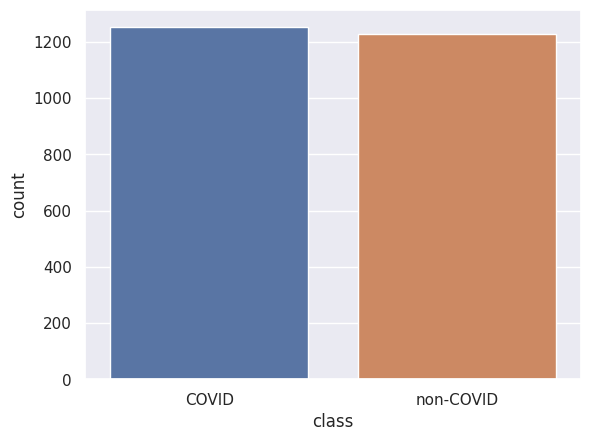

In [ ]:
#criar dataframe e plotar grafico Covid x Não Covid
data = create_data_frame()
sns.set(style="darkgrid")
ax = sns.countplot(x="class", data=data)

In [ ]:
data = random_data_frame(data)
data

,file,id_class,class
0,COVID/Covid (139).png,0,COVID
1,COVID/Covid (820).png,0,COVID
2,non-COVID/Non-Covid (66).png,1,non-COVID
3,non-COVID/Non-Covid (526).png,1,non-COVID
4,COVID/Covid (1048).png,0,COVID
...,...,...,...
2476,non-COVID/Non-Covid (187).png,1,non-COVID
2477,COVID/Covid (687).png,0,COVID
2478,COVID/Covid (649).png,0,COVID
2479,non-COVID/Non-Covid (148).png,1,non-COVID


In [ ]:
images = load_images(data)

images

2481it [00:26, 93.13it/s] 


Total de imagens carregadas: 2481


array([[[[0.77254902, 0.77254902, 0.77254902],
         [0.77647059, 0.77647059, 0.77647059],
         [0.75686275, 0.75686275, 0.75686275],
         ...,
         [0.75686275, 0.75686275, 0.75686275],
         [0.75294118, 0.75294118, 0.75294118],
         [0.66666667, 0.66666667, 0.66666667]],

        [[0.75686275, 0.75686275, 0.75686275],
         [0.76862745, 0.76862745, 0.76862745],
         [0.77254902, 0.77254902, 0.77254902],
         ...,
         [0.75686275, 0.75686275, 0.75686275],
         [0.75294118, 0.75294118, 0.75294118],
         [0.76862745, 0.76862745, 0.76862745]],

        [[0.75686275, 0.75686275, 0.75686275],
         [0.76078431, 0.76078431, 0.76078431],
         [0.76470588, 0.76470588, 0.76470588],
         ...,
         [0.77254902, 0.77254902, 0.77254902],
         [0.77254902, 0.77254902, 0.77254902],
         [0.76862745, 0.76862745, 0.76862745]],

        ...,

        [[0.77647059, 0.77647059, 0.77647059],
         [0.77647059, 0.77647059, 0.77647059]

In [ ]:
images.shape

(2481, 64, 64, 3)

In [ ]:
categories = data['id_class'].values
categories

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
nsamples, nx, ny,nz = images.shape
d2_images = images.reshape((nsamples,nx*ny*nz)) #reshape para transformar em uma matriz de 2 dimensões
d2_images

array([[0.77254902, 0.77254902, 0.77254902, ..., 0.29411765, 0.29411765,
        0.29411765],
       [0.93333333, 0.93333333, 0.93333333, ..., 0.83529412, 0.83529412,
        0.83529412],
       [0.80784314, 0.80784314, 0.80784314, ..., 0.85490196, 0.85490196,
        0.85490196],
       ...,
       [0.25882353, 0.25882353, 0.25882353, ..., 0.44705882, 0.44705882,
        0.44705882],
       [0.25098039, 0.25098039, 0.25098039, ..., 0.76078431, 0.76078431,
        0.76078431],
       [0.80784314, 0.80784314, 0.80784314, ..., 0.81176471, 0.81176471,
        0.81176471]])

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(
    d2_images, categories, test_size=0.2)

In [ ]:
# train and evaluate a k-NN classifer on the raw pixel intensities
print("[INFO] Treinando modelo..")
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_images, train_labels)


[INFO] Treinando modelo..


KNeighborsClassifier()

In [ ]:
# Realizando predição
y_pred = model.predict(test_images)


In [ ]:
#Calculando métricas do modelo
from sklearn.metrics import precision_score, recall_score
precision = precision_score(test_labels, y_pred,average='macro')
recall = recall_score(test_labels, y_pred,average='macro')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==test_labels).sum()/len(y_pred), 3)))

Precision: 0.902 / Recall: 0.901 / Accuracy: 0.901


In [ ]:
classification_summary(test_labels, y_pred.round().astype('int'), y_pred)

Accuracy = 90.10000000000001%
F1 Score = 90.10000000000001%
AUC score: 90.100
Recal Score = 90.10000000000001%
Precision = 90.2%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       252
           1       0.92      0.88      0.90       245

    accuracy                           0.90       497
   macro avg       0.90      0.90      0.90       497
weighted avg       0.90      0.90      0.90       497



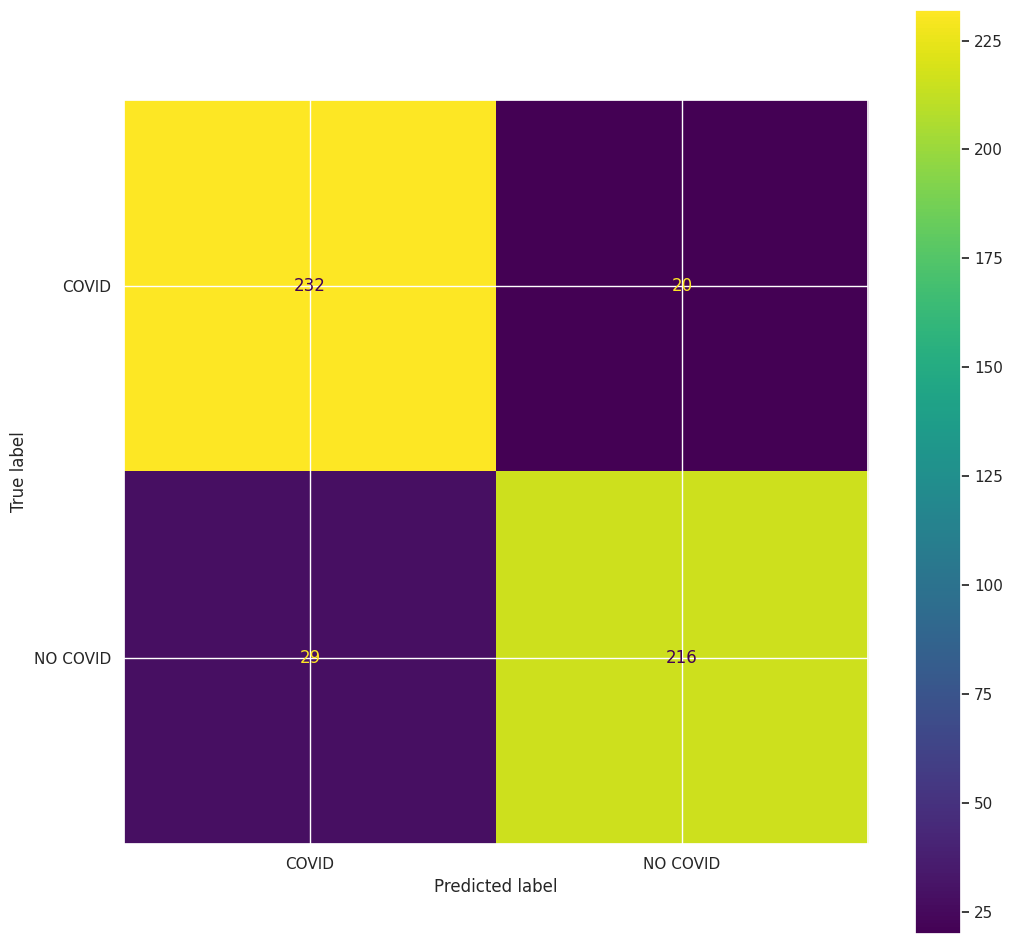

In [ ]:
#Plotando matriz de confusão
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(test_labels, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['COVID','NO COVID'])
fig, ax = plt.subplots(figsize=(12,12))
cm_display.plot(ax=ax)


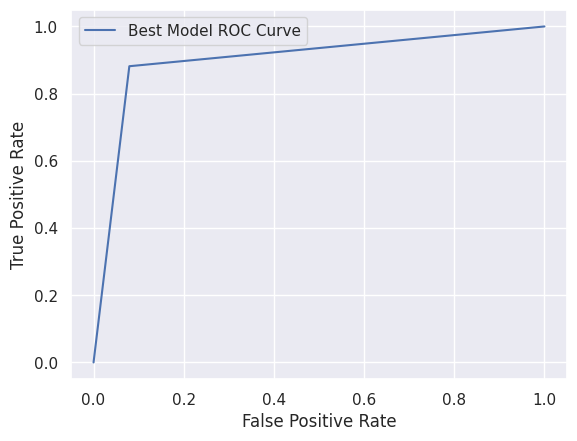

In [ ]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
    test_labels.round(), y_pred.round())
plt.plot(false_positive_rate, true_positive_rate,
         label='Best Model ROC Curve')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()